# Курсовой проект
## по предмету: "Библиотеки Python для Data Science"

### Цель проекта: "Прогноз цен на недвижимость"

### Исполнил: Люкшин Павел
(также именуюсь на kaggle)

#### 1. Создание базовой модели
Модель, полученая с наименьшими затратами времени, в дальнейшем используемая для оценки других моделей

#### 1.1 Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

#### 1.2 Пути к директориям

In [2]:
DATASET_TRAIN = './train.csv'
DATASET_TEST = './test.csv'

#### 1.3 Считываем данные. По строкам - наблюдения, по столбцам - признаки.

In [3]:
df_train = pd.read_csv(DATASET_TRAIN, sep=',')
df_test = pd.read_csv(DATASET_TEST, sep=',')

#### 1.4 Обработка пропусков для создания базовой модели

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
df_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [6]:
def obr(df):
    col=df.columns
    for i in col:
        if df[i].dtypes!='object':
            if df[i].count()!=df.shape[0]:
                df[i][df[i].isnull()]=df[i].median()
        else:
            df[i][df[i]=='B']=1
            df[i][df[i]=='A']=0
    return df

In [7]:
obr(df_test)
obr(df_train)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,900.0,0,0,1,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,900.0,0,6,1,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,900.0,1,9,1,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,900.0,1,5,1,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1,171842.411855


#### 1.5 Отбор признаков

In [8]:
X=df_train.iloc[:,1:19]
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,900.0,0,0,1
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1
3,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,900.0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,900.0,1,9,1
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,900.0,1,5,1
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1


In [9]:
y=df_train.iloc[:,19]
y

0       305018.871089
1       177734.553407
2       282078.720850
3       168106.007630
4       343995.102962
            ...      
9995    119367.455796
9996    199715.148807
9997    165953.912580
9998    171842.411855
9999    177685.627486
Name: Price, Length: 10000, dtype: float64

#### 1.6 Разбиение на train и valid

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle = True, random_state = 42)

#### 1.7 Построение модели

In [12]:
from sklearn.metrics import r2_score

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rfr=RandomForestRegressor(n_estimators=1000, max_features=8, max_depth=14, random_state=42)

In [15]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features=8, n_estimators=1000,
                      random_state=42)

In [16]:
y_pred_rf=rfr.predict(X_valid)

In [17]:
r2_score(y_valid, y_pred_rf)

0.7280140033459483

#### 1.8 Прогнозирование на тестовом датасете

In [18]:
Z=df_test.iloc[:,1:]
Z

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1036.0,1,1,1
1,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0
2,27,2.0,59.463678,32.925087,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,900.0,0,1,1
3,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,900.0,0,0,1
4,74,1.0,53.837056,32.925087,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,990.0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,1,1,31,6119,4,900.0,1,2,1
4996,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,520.0,0,7,1
4997,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,1015.0,2,5,1
4998,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,900.0,0,11,1


In [19]:
y_pred_rf_t=rfr.predict(Z)

In [20]:
sample = './sample_submission.csv'

In [21]:
df_sample = pd.read_csv(sample, sep=',')

In [22]:
df_sample

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0
...,...,...
4995,10379,200000.0
4996,16138,200000.0
4997,3912,200000.0
4998,5722,200000.0


In [23]:
df_sample['Price']=y_pred_rf_t

In [24]:
df_sample

,Id,Price
0,4567,161565.229245
1,5925,122507.584776
2,960,143109.077196
3,3848,129338.334997
4,746,197904.926598
...,...,...
4995,10379,188277.132481
4996,16138,391191.657287
4997,3912,149391.756312
4998,5722,185964.586335


In [25]:
# df_sample.to_csv('sample.csv', index=False)

#### 2. Поиск более точной модели

#### 2.1 Подключение библиотек

In [26]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
matplotlib.rcParams.update({'font.size': 14})

#### 2.2 Пути к директориям

In [29]:
df_train = pd.read_csv(DATASET_TRAIN, sep=',')
df_test = pd.read_csv(DATASET_TEST, sep=',')

In [30]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Прогнозируемые значения')
    plt.ylabel('Истинные значения')
    plt.title('Прогнозирование обучающей выборки')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Прогнозируемые значения')
    plt.ylabel('Истинные значения')
    plt.title('Прогнозирование тестовой выборки')

    plt.show()

In [31]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

#### 2.3 Изучение данных

#### 2.3.1 Целевая переменная

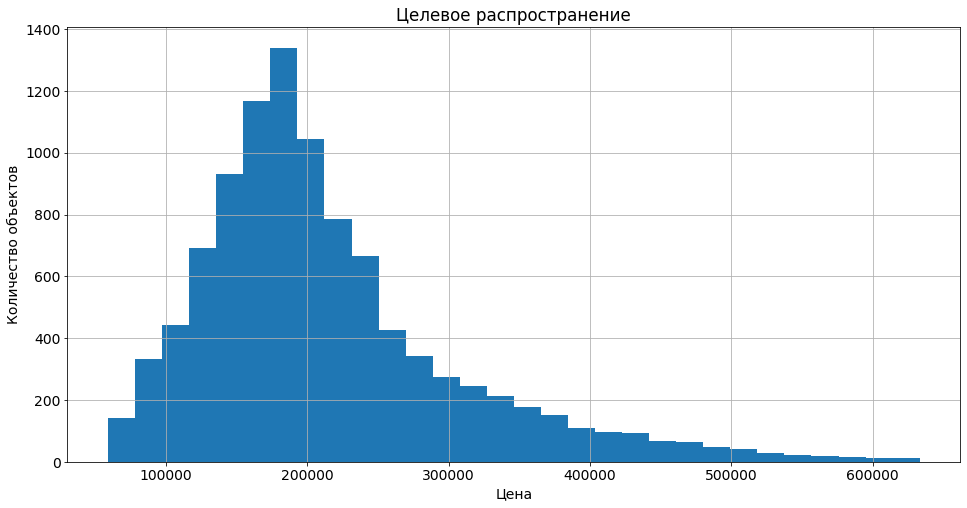

In [32]:
plt.figure(figsize = (16, 8))

df_train['Price'].hist(bins=30)
plt.ylabel('Количество объектов')
plt.xlabel('Цена')

plt.title('Целевое распространение')
plt.show()

#### 2.3.2 Количественные переменные

In [33]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### 2.3.3 Номинативные переменные

In [34]:
df_train.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [35]:
df_train['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [36]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [37]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [38]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

#### 2.4 Обработка выбросов и пропусков

Поскольку санитарная норма жилой площади на человека составляет 6 кв.м, принятые минимальные значения площади кухни и суммы площадей проходов и санузла составляют 3 кв.м, минимальная общая площадь квартиры не может быть меньше 12 кв.м. В то же время оптимальные значения площади кухни для одно-, двух- и трёхкомнатных квартир составляют 8, 12 и 16 кв.м соответственно.

In [39]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
              
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X['HouseFloor_outlier_1'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier_1'] = 1
        
        for i in X.loc[X['HouseFloor'] == 0].index:
            X.loc[i, 'HouseFloor']=X['HouseFloor'][X['HouseYear'] ==X.loc[i, 'HouseYear'] ].median()
        
        for i in X.loc[X['Floor'] > X['HouseFloor']].index:
            H=X.loc[i, 'HouseFloor']
            f=X.loc[i, 'Floor']
            X.loc[i, 'HouseFloor']=f
            X.loc[i, 'Floor']=H
            
        # KitchenSquare, Square, LifeSquare
        X['Square_outlier'] = 0
        X.loc[X['Square']<12, 'Square_outlier']=1
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        
        for i in X.loc[X['LifeSquare']>2*X['Square']].sort_values('LifeSquare').index:
            if (X.loc[i, 'LifeSquare']>2*X.loc[i, 'Square'])&(X.loc[i, 'Square']>12):
                while X.loc[i, 'LifeSquare']>X.loc[i, 'Square']:
                    X.loc[i, 'LifeSquare']=X.loc[i, 'LifeSquare']/10
                    
        for i in X.loc[X['Square']<X['LifeSquare']].index:
            h=X.loc[i, 'Square'] 
            b=X.loc[i, 'LifeSquare']
            X.loc[i, 'Square']=b
            X.loc[i, 'LifeSquare']=h
            
        X['Square'][X['Square']<12]=12
        
        for i in X.loc[((X['Square']-X['LifeSquare'])>=6)&(X['Square']>12)&\
                              (X['KitchenSquare']<3)&(X['LifeSquare']>6)].index:
            if (X.loc[i, 'Rooms']==1):
                if (X.loc[i, 'Square'] - X.loc[i, 'LifeSquare']) <=11:
                    X.loc[i, 'KitchenSquare']=X.loc[i, 'Square'] - X.loc[i, 'LifeSquare'] - 3
                else:
                    X.loc[i, 'KitchenSquare']=8
            elif (X.loc[i, 'Rooms']==2):
                if (X.loc[i, 'Square'] - X.loc[i, 'LifeSquare'])<=15:
                    X.loc[i, 'KitchenSquare']=X.loc[i, 'Square'] - X.loc[i, 'LifeSquare'] - 3
                else:
                    X.loc[i, 'KitchenSquare']=12
            elif (X.loc[i, 'Rooms']>2):
                if (X.loc[i, 'Square'] - X.loc[i, 'LifeSquare'])<=19:
                    X.loc[i, 'KitchenSquare']=X.loc[i, 'Square'] - X.loc[i, 'LifeSquare'] - 3
                else:
                    X.loc[i, 'KitchenSquare']=16
                    
        for i in X.loc[(X['LifeSquare'].isna())|(X['LifeSquare']<6)].index:
            if (X.loc[i, 'Rooms']==1):
                if (X.loc[i, 'KitchenSquare']<3):
                    if (X.loc[i, 'Square'] - 11) >=6:
                        X.loc[i, 'KitchenSquare']=8
                        X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                    else:
                        X.loc[i, 'KitchenSquare']=3
                        X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                elif (X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3)<=6:
                    X.loc[i, 'KitchenSquare']=3
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                else:
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
            elif (X.loc[i, 'Rooms']==2):
                if (X.loc[i, 'KitchenSquare']<3):
                    if (X.loc[i, 'Square'] - 15) >=12:
                        X.loc[i, 'KitchenSquare']=12
                        X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                    else:
                        X.loc[i, 'KitchenSquare']=3
                        X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                elif (X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3)<=12:
                    X.loc[i, 'KitchenSquare']=3
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                else:
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
            elif (X.loc[i, 'Rooms']>2):
                if (X.loc[i, 'KitchenSquare']<3):
                    if (X.loc[i, 'Square'] - 19) >=18:
                        X.loc[i, 'KitchenSquare']=16
                        X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                    else:
                        X.loc[i, 'KitchenSquare']=3
                        X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                elif (X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3)<=18:
                    X.loc[i, 'KitchenSquare']=3
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3  
                else:
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                    
        for i in X.loc[(X['KitchenSquare']<3)].index:
            if (X.loc[i, 'Rooms']==1):
                if (X.loc[i, 'Square'] - 11) >=6:
                    X.loc[i, 'KitchenSquare']=8
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                else:
                    X.loc[i, 'KitchenSquare']=3
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
            elif (X.loc[i, 'Rooms']==2):
                if (X.loc[i, 'Square'] - 15) >=12:
                    X.loc[i, 'KitchenSquare']=12
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                else:
                    X.loc[i, 'KitchenSquare']=3
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
            elif (df_train.loc[i, 'Rooms']>2):
                if (X.loc[i, 'Square'] - 19) >=18:
                    X.loc[i, 'KitchenSquare']=16
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                else:
                    X.loc[i, 'KitchenSquare']=3
                    X.loc[i, 'LifeSquare']=X.loc[i, 'Square']-X.loc[i, 'KitchenSquare']-3
                    
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        
        
        
        X.fillna(self.medians, inplace=True)
        
        return X


#### 2.5 Построение новых признаков

In [40]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [41]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

#### 2.6 Отбор признаков

In [42]:
df_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [43]:
feature_names = ['Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseYear_outlier', 'HouseFloor_outlier_1', 'IsDistrictLarge',
                     'MedPriceByFloorYear']

target_name = 'Price'

#### 2.7 Разбиение на train и test

In [44]:
df_train = pd.read_csv(DATASET_TRAIN, sep=',')
df_test = pd.read_csv(DATASET_TEST, sep=',')

df_train['Floor'] = df_train['Floor'].astype('float64')
df_test['Floor'] = df_test['Floor'].astype('float64')

X = df_train.drop(columns=target_name)
y = df_train[target_name]

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [46]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
df_test = preprocessor.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

((6700, 24), (3300, 24), (5000, 24))

In [47]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
df_test = features_gen.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

((6700, 31), (3300, 31), (5000, 31))

In [48]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
df_test = df_test[feature_names + new_feature_names]

In [49]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0, 0)

#### 2.8 Построение модели

In [50]:
"""parameters_rf=[{'max_depth': np.arange(1,20),
             'max_features': np.arange(1,20),
             'n_estimators': [i for i in range(50, 1051, 100)]}]
             
gs_1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_grid=parameters_rf,
                   scoring='r2')"""

"parameters_rf=[{'max_depth': np.arange(1,20),\n             'max_features': np.arange(1,20),\n             'n_estimators': [i for i in range(50, 1051, 100)]}]\n             \ngs_1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42),\n                   param_grid=parameters_rf,\n                   scoring='r2')"

In [51]:
"""%%time
gs_1.fit(X_train, y_train)

gs_1.best_params_"""

'%%time\ngs_1.fit(X_train, y_train)\n\ngs_1.best_params_'

In [52]:
"""parameters_ab=[{'learning_rate': np.arange(0, 2, 0.1),
                'n_estimators': [i for i in range(50, 1051, 100)]}]
                
gs_2 = GridSearchCV(estimator=AdaBoostRegressor(random_state=42),
                   param_grid=parameters_ab,
                   scoring='r2')"""

"parameters_ab=[{'learning_rate': np.arange(0, 2, 0.1),\n                'n_estimators': [i for i in range(50, 1051, 100)]}]\n                \ngs_2 = GridSearchCV(estimator=AdaBoostRegressor(random_state=42),\n                   param_grid=parameters_ab,\n                   scoring='r2')"

In [53]:
"""%%time
gs_2.fit(X_train, y_train)

gs_2.best_params_"""

'%%time\ngs_2.fit(X_train, y_train)\n\ngs_2.best_params_'

In [54]:
rf_model = RandomForestRegressor(n_estimators=350, max_features=8, max_depth=16, random_state=42, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, max_features=8, n_estimators=350,
                      random_state=42)

#### 2.9 Оценка модели

Train R2:	0.949
Test R2:	0.74


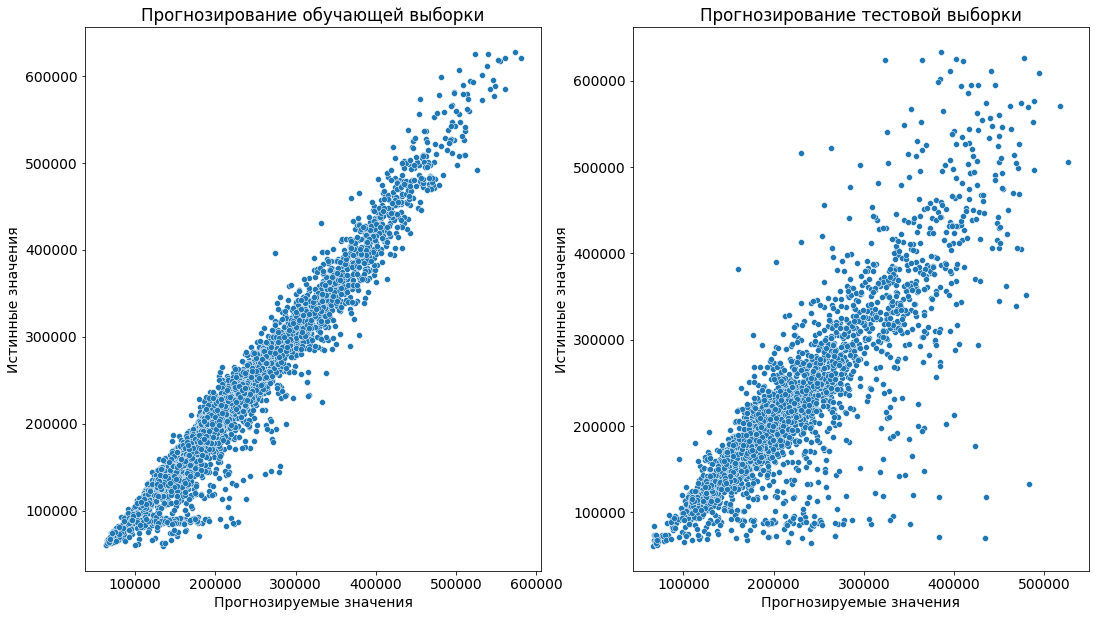

In [55]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [56]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([0.74079675, 0.70055799, 0.73144177])

In [57]:
cv_score.mean()

0.7242655040989305

#### Важность признаков
На основании важности признаков, часть из них были убраны, за счёт чего, значение R2 выросло

In [58]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
0,Square,0.319417
1,LifeSquare,0.130626
18,IsDistrictLarge,0.104171
10,Social_2,0.072989
9,Social_1,0.068398
11,Social_3,0.063727
6,Ecology_1,0.040758
5,HouseYear,0.036791
2,KitchenSquare,0.033698
19,MedPriceByFloorYear,0.032101


In [59]:
y_pred_rf_t=rf_model.predict(df_test)

In [60]:
df_sample = pd.read_csv(sample, sep=',')

In [61]:
df_sample['Price']=y_pred_rf_t

In [62]:
df_sample

,Id,Price
0,4567,160997.574150
1,5925,125263.654145
2,960,145601.129601
3,3848,116203.232104
4,746,220899.896260
...,...,...
4995,10379,186970.966782
4996,16138,410354.632304
4997,3912,146198.848479
4998,5722,192754.610017


In [63]:
#df_sample.to_csv('sample3.csv', index=False)

Полученная модель превосходит по значению R2 базовую модель на 0.012

p.s.: полагаю, что при обработке данных лучше было разбить объекты на группы и на основе этого разбиения, за счет усложнения методов обработки выбросов и пропусков (учитывающих особенности данных групп), можно было повысить точность предсказания.